# **Exploratory Data Analysis of Fitness Trackers available in the Indian Market**

This notebook uses a fitness tracker dataset. The data has been collected from an e-commerce website Flipkart using webscraping technique.

# Dataset details
This dataset contains 565 samples with 11 attributes. There are some missing values in this dataset.
Here are the columns in this dataset-

1.   **Brand Name**: This indicates the manufacturer of the product (fitness tracker)
2.   **Device Type**: This has two categories- FitnessBand and Smartwatch
3.  **Model Name**: This indicates the variant/Product Name
4.   **Color**: This includes the color of the Strap/Body of the fitness tracker
5.   **Selling Price**: This column has the Selling Price or the Discounted Price of the fitness tracker
6.   **Original Price**: This includes the Original Price of the product from the manufacturer.
7.   **Display**: This categorical variable shows the type of display for the fitness tracker. eg: AMOLED, LCD,OLED, etc.
8.   **Rating (Out of 5)**: Average customer ratings on a scale of 5.
9.   **Strap Material**: Details of the material used for the strap of the fitness tracker.
10.  **Average Battery Life (in days)**: Quoted average battery life from the manufacturer based on the individual product pages. (It is not the scraped data)
11.  **Reviews**:  count of product reviews received.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Fitness_trackers.csv',thousands=',')
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [3]:
#check missing values 
df.isna().sum().sort_values(ascending=False)

Reviews                           487
Rating (Out of 5)                  51
Average Battery Life (in days)      0
Strap Material                      0
Display                             0
Original Price                      0
Selling Price                       0
Color                               0
Model Name                          0
Device Type                         0
Brand Name                          0
dtype: int64

In [4]:
#replace NaN values
df=df.fillna(0)
df.iloc[:5]

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,0.0
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,0.0
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,0.0
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,0.0
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,0.0


In [5]:
df.shape

(565, 11)

In [6]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling Price,565.0,22110.373451,19914.926066,1195.0,8990.0,15995.0,29900.0,122090.0
Original Price,565.0,25365.361062,20384.028759,1599.0,12999.0,19995.0,32900.0,122090.0
Rating (Out of 5),565.0,3.848142,1.269186,0.0,3.9,4.2,4.5,5.0
Average Battery Life (in days),565.0,9.026549,7.868670,1.0,2.0,7.0,14.0,45.0
Reviews,565.0,344.159292,2243.607989,0.0,0.0,0.0,0.0,23426.0


In [7]:
#check for data types
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                           float64
dtype: object

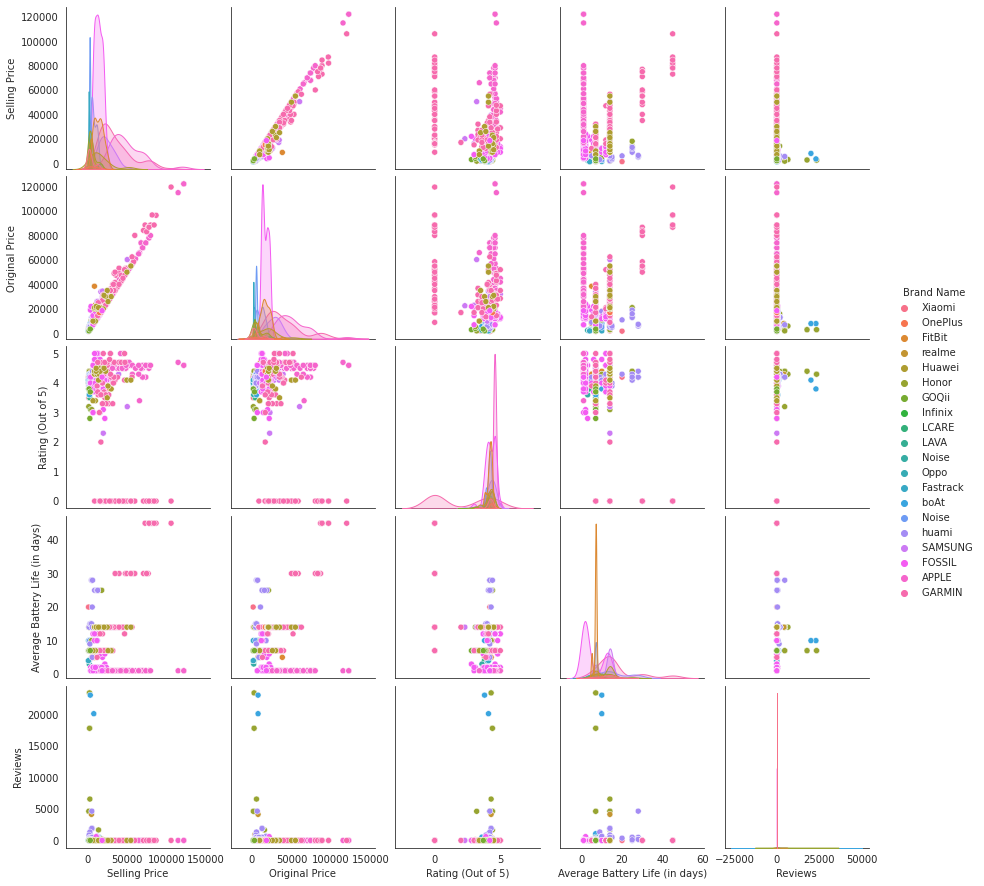

In [8]:
sns.set_style("white")
sns.pairplot(df, hue='Brand Name')

In [9]:
# count of products
df['Brand Name'].groupby(df['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

In [10]:
#count of brands
df['Brand Name'].nunique()

20

In [11]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False)

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
huami        36
Huawei       26
Honor        20
Noise        17
realme       12
Xiaomi       10
Fastrack      6
GOQii         4
boAt          4
OnePlus       3
LCARE         2
Noise         2
Oppo          2
Infinix       1
LAVA          1
Name: Brand Name, dtype: int64

In [12]:
#average ratings by Brand
df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10]

Brand Name
APPLE       4.545349
OnePlus     4.300000
FOSSIL      4.244361
SAMSUNG     4.229167
Honor       4.195000
FitBit      4.186275
Xiaomi      4.170000
Huawei      4.161538
huami       4.152778
realme      4.141667
Name: Rating (Out of 5), dtype: float64

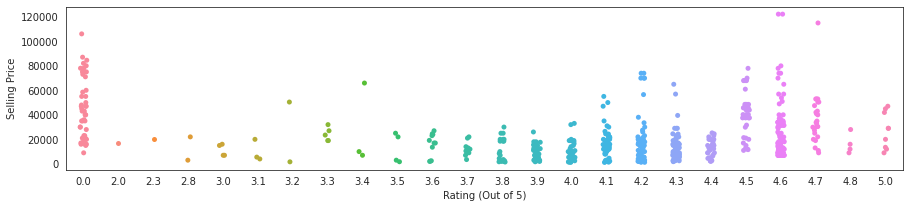

In [13]:
# Rating vs Selling Price
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df)

In [14]:
# Brandwise Mean Selling prices
df.groupby('Brand Name')['Average Battery Life (in days)'].mean().sort_values(ascending=False).iloc[:10]

Brand Name
GARMIN      16.960396
huami       16.055556
Oppo        14.000000
Xiaomi      12.500000
SAMSUNG     11.812500
Honor       11.750000
Huawei      11.307692
realme      10.500000
OnePlus      9.333333
boAt         8.500000
Name: Average Battery Life (in days), dtype: float64

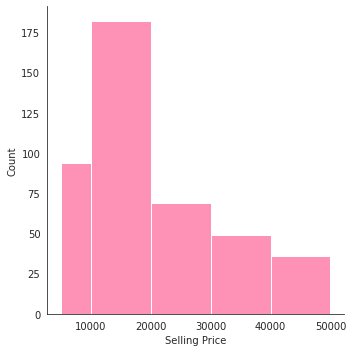

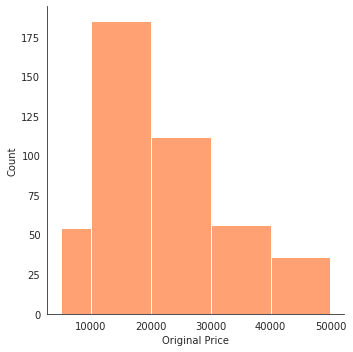

In [15]:
sns.set_style("white")
sns.displot(df, x='Selling Price',bins=[5000,10000,20000,30000,40000,50000],color='#fd6c9e')
sns.displot(df, x='Original Price',bins=[5000,10000,20000,30000,40000,50000],color='#ff8243')

In [16]:
# color
df['Color'].groupby(df['Color']).count().sort_values(ascending=False).iloc[:10]

Color
Black        193
Blue          30
Silver        25
Grey          21
Gold          20
White         17
Brown         13
Red           10
Black          8
Deep Navy      7
Name: Color, dtype: int64

In [17]:
# color
df['Strap Material'].groupby(df['Strap Material']).count().sort_values(ascending=False).iloc[:10]

Strap Material
Silicone                      232
Stainless Steel                97
Leather                        59
Aluminium                      57
Elastomer                      45
Thermoplastic polyurethane     33
Plastic                        16
Nylon                          12
Rubber                         11
leather                         1
Name: Strap Material, dtype: int64

In [18]:
# Brandwise Mean Selling prices
df.groupby('Brand Name')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand Name
APPLE       49414.0
GARMIN      35039.0
SAMSUNG     22902.0
Oppo        16490.0
Huawei      15875.0
FitBit      14019.0
FOSSIL      13825.0
huami        7548.0
OnePlus      6933.0
Honor        5510.0
realme       4403.0
boAt         4247.0
Xiaomi       4101.0
Noise        3330.0
GOQii        3124.0
LCARE        2347.0
LAVA         1999.0
Noise        1949.0
Fastrack     1755.0
Infinix      1499.0
Name: Selling Price, dtype: float64

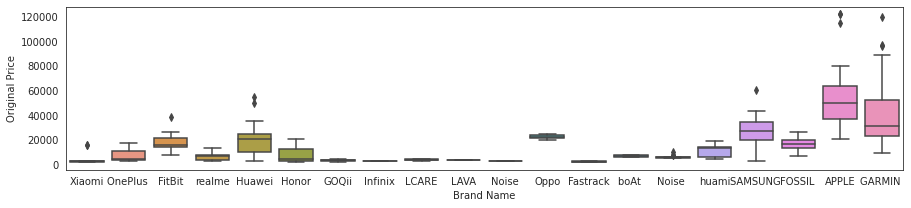

In [19]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.boxplot(x="Brand Name", y="Original Price", data=df)

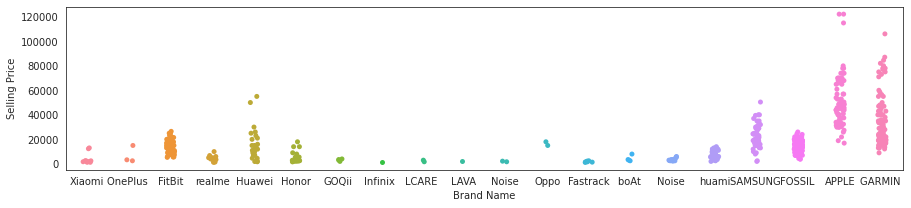

In [20]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Selling Price", x="Brand Name", data=df)

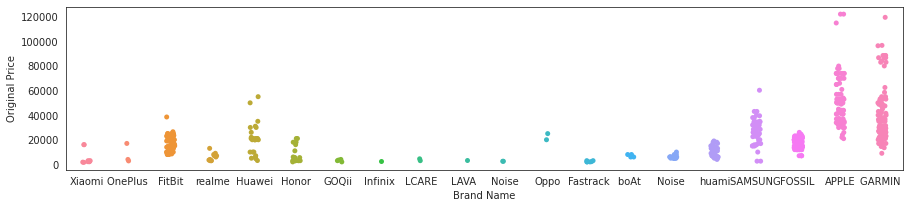

In [21]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Original Price", x="Brand Name", data=df)